In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=[224,224]
train_path='Dataset/Train'
test_path='Dataset/Test'

In [3]:
mobilnet=VGG19(input_shape=IMAGE_SIZE+[3],weights='imagenet', include_top=False)

In [4]:
for layer in mobilnet.layers:
    layer.trainable=False

In [5]:
folders = glob('Dataset/Train/*')

In [6]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [7]:
x=Flatten()(mobilnet.output)

In [8]:
prediction=Dense(len(folders),activation='softmax')(x)

In [9]:
model=Model(inputs=mobilnet.input,outputs=prediction)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
from tensorflow.keras.layers import MaxPooling2D

In [12]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding='same',activation='relu',input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [15]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [16]:
training_set=train_datagen.flow_from_directory('Dataset/Train',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical')

Found 416 images belonging to 2 classes.


In [17]:
training_set

In [18]:
test_set=test_datagen.flow_from_directory('Dataset/Test',
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='categorical')

Found 134 images belonging to 2 classes.


In [19]:
test_set

In [21]:
r=model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)

C:\Users\User10\AppData\Local\Temp\ipykernel_1032\2608189736.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r=model.fit_generator(


Epoch 1/50


13/13 [==============================] - 21s 1s/step - loss: 1.2735 - accuracy: 0.4976 - val_loss: 0.6437 - val_accuracy: 0.6791
Epoch 2/50
13/13 [==============================] - 11s 806ms/step - loss: 0.6689 - accuracy: 0.5938 - val_loss: 0.7055 - val_accuracy: 0.4552
Epoch 3/50
13/13 [==============================] - 14s 1s/step - loss: 0.5780 - accuracy: 0.6923 - val_loss: 0.9918 - val_accuracy: 0.3657
Epoch 4/50
13/13 [==============================] - 14s 1s/step - loss: 0.4655 - accuracy: 0.7596 - val_loss: 0.8882 - val_accuracy: 0.3358
Epoch 5/50
13/13 [==============================] - 12s 892ms/step - loss: 0.4071 - accuracy: 0.8197 - val_loss: 0.9537 - val_accuracy: 0.4403
Epoch 6/50
13/13 [==============================] - 11s 845ms/step - loss: 0.4027 - accuracy: 0.8125 - val_loss: 0.5597 - val_accuracy: 0.6119
Epoch 7/50
13/13 [==============================] - 10s 758ms/step - loss: 0.3351 - accuracy: 0.8822 - val_loss: 0.5782 - val_accuracy: 0.6716
Epoch 

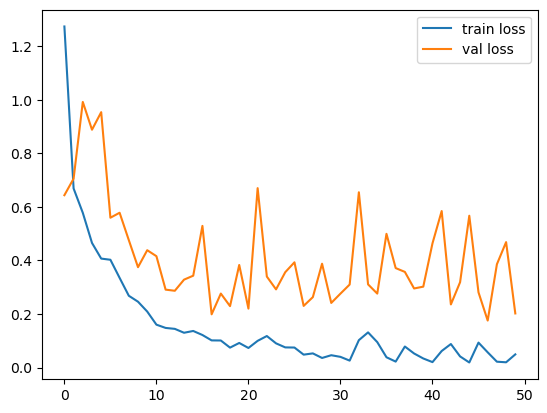

<Figure size 640x480 with 0 Axes>

In [23]:
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

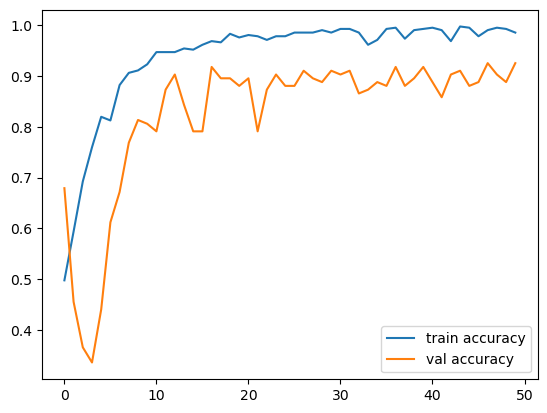

<Figure size 640x480 with 0 Axes>

In [24]:
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [25]:
from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

C:\Users\User10\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
y_pred=model.predict(test_set)

5/5 [==============================] - 4s 170ms/step


In [27]:
y_pred

array([[3.08798999e-01, 6.91201031e-01],
       [2.08915994e-02, 9.79108393e-01],
       [1.19390888e-02, 9.88060832e-01],
       [1.00000000e+00, 1.01415167e-13],
       [9.99989152e-01, 1.08029089e-05],
       [9.99999762e-01, 2.20604136e-07],
       [1.00000000e+00, 1.28192760e-20],
       [1.00000000e+00, 2.21019167e-08],
       [4.82400544e-02, 9.51759994e-01],
       [1.16266524e-02, 9.88373339e-01],
       [7.98274390e-03, 9.92017269e-01],
       [1.00000000e+00, 1.21866688e-12],
       [1.62139282e-01, 8.37860703e-01],
       [1.00000000e+00, 1.13536850e-22],
       [6.60024583e-02, 9.33997512e-01],
       [9.95793343e-01, 4.20660945e-03],
       [1.00000000e+00, 7.89135957e-09],
       [1.00000000e+00, 1.33401258e-18],
       [4.73670736e-02, 9.52632904e-01],
       [9.98004496e-01, 1.99549785e-03],
       [9.99999046e-01, 8.98302460e-07],
       [1.00000000e+00, 1.86514883e-11],
       [9.99999046e-01, 9.36832691e-07],
       [1.00000000e+00, 1.15182050e-12],
       [7.384442

In [28]:
import numpy as np
y_pred=np.argmax(y_pred,axis=1)

In [29]:
y_pred

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0], dtype=int64)

In [30]:
from tensorflow.keras.preprocessing import image

In [31]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))

In [32]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [33]:
x.shape

(224, 224, 3)

In [34]:
x=x/255

In [35]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [37]:
model.predict(img_data)

1/1 [==============================] - 1s 505ms/step


array([[0., 1.]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data),axis=1)


1/1 [==============================] - 0s 93ms/step


In [39]:
if(a==1):
    print('Uninfected')
else:
    print('Infected')

Uninfected


In [40]:
from tensorflow.keras.applications.vgg16 import VGG16

In [41]:
mobilnet = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [42]:
for layer in mobilnet.layers:
    layer.trainable = False

In [43]:
folders = glob('Dataset/Train/*')

In [44]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [45]:
x = Flatten()(mobilnet.output)

In [46]:
prediction = Dense(len(folders), activation='softmax')(x)

In [48]:
model1 = Model(inputs=mobilnet.input, outputs=prediction)

In [49]:
model1.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [50]:
from tensorflow.keras.layers import MaxPooling2D

In [51]:
model1=Sequential()
model1.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model1.add(MaxPooling2D(pool_size=2))
model1.add(Flatten())
model1.add(Dense(500,activation="relu"))
model1.add(Dense(2,activation="softmax"))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 28, 28, 64)       

In [52]:
model1.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [53]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [54]:
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [55]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [56]:
r = model1.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\User10\AppData\Local\Temp\ipykernel_1032\3495312219.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model1.fit_generator(


Epoch 1/50
13/13 [==============================] - 32s 971ms/step - loss: 1.0764 - accuracy: 0.5673 - val_loss: 0.6818 - val_accuracy: 0.5522
Epoch 2/50
13/13 [==============================] - 12s 917ms/step - loss: 0.6243 - accuracy: 0.6562 - val_loss: 0.8295 - val_accuracy: 0.3806
Epoch 3/50
13/13 [==============================] - 12s 937ms/step - loss: 0.5386 - accuracy: 0.7115 - val_loss: 1.1280 - val_accuracy: 0.3582
Epoch 4/50
13/13 [==============================] - 11s 820ms/step - loss: 0.4901 - accuracy: 0.7668 - val_loss: 0.9609 - val_accuracy: 0.3955
Epoch 5/50
13/13 [==============================] - 12s 928ms/step - loss: 0.4239 - accuracy: 0.7981 - val_loss: 1.4016 - val_accuracy: 0.3731
Epoch 6/50
13/13 [==============================] - 11s 830ms/step - loss: 0.4212 - accuracy: 0.7909 - val_loss: 0.8216 - val_accuracy: 0.4627
Epoch 7/50
13/13 [==============================] - 11s 817ms/step - loss: 0.3691 - accuracy: 0.8389 - val_loss: 1.2033 - val_accuracy: 0.4030

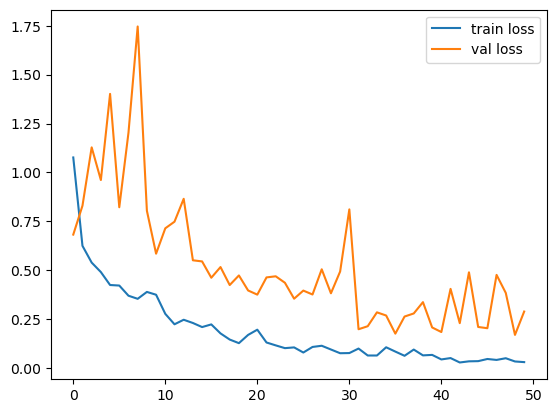

<Figure size 640x480 with 0 Axes>

In [57]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

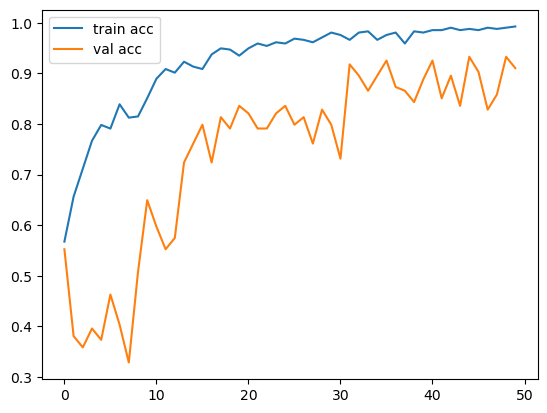

<Figure size 640x480 with 0 Axes>

In [58]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [59]:
from tensorflow.keras.models import load_model
model1.save('model_vgg16.h5')

In [60]:
y_pred = model1.predict(test_set)

5/5 [==============================] - 9s 198ms/step


In [61]:
y_pred

array([[8.60690773e-01, 1.39309242e-01],
       [9.11099538e-02, 9.08890069e-01],
       [2.97772825e-01, 7.02227116e-01],
       [5.75776096e-04, 9.99424219e-01],
       [9.99687552e-01, 3.12483840e-04],
       [9.72329557e-01, 2.76704561e-02],
       [9.99967575e-01, 3.24493958e-05],
       [5.81639644e-04, 9.99418378e-01],
       [9.98622537e-01, 1.37742341e-03],
       [9.99761164e-01, 2.38873341e-04],
       [9.99688029e-01, 3.11982876e-04],
       [5.81453815e-02, 9.41854596e-01],
       [6.84503291e-04, 9.99315500e-01],
       [9.99991775e-01, 8.23393566e-06],
       [9.99800146e-01, 1.99881149e-04],
       [1.26243718e-02, 9.87375617e-01],
       [9.37057674e-01, 6.29423410e-02],
       [9.99810755e-01, 1.89273313e-04],
       [4.16622490e-01, 5.83377481e-01],
       [6.96134614e-03, 9.93038714e-01],
       [1.00000000e+00, 2.42243920e-12],
       [8.67788568e-02, 9.13221121e-01],
       [9.99986649e-01, 1.32994228e-05],
       [9.99900460e-01, 9.95090668e-05],
       [3.430019

In [62]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [63]:
y_pred

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [64]:
from tensorflow.keras.preprocessing import image

In [67]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))


In [68]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [69]:
x.shape

(224, 224, 3)

In [70]:
x=x/255

In [71]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [72]:
model1.predict(img_data)

1/1 [==============================] - 0s 396ms/step


array([[0., 1.]], dtype=float32)

In [73]:
a=np.argmax(model1.predict(img_data), axis=1)

1/1 [==============================] - 0s 66ms/step


In [74]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected
